In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [5]:
import numpy as np

In [6]:
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
cnf_mx = confusion_matrix(y_train, y_pred)

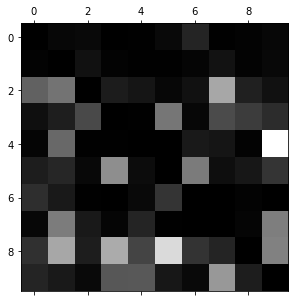

In [11]:
import matplotlib.pyplot as plt
row_sum = cnf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = cnf_mx / row_sum
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [12]:
# Explanation at https://www.baeldung.com/cs/multi-class-f1-score
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average="macro")

0.9672164755274896

In [13]:
from sklearn.metrics import accuracy_score
y_test_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9688

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights':['uniform', 'distance'],
        'n_neighbors':[3, 5, 7,10]
    }
]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 10],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [15]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [16]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [17]:
cvres = grid_search.cv_results_

In [19]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.7635116240110559 {'n_neighbors': 3, 'weights': 'uniform'}
0.7338483040338332 {'n_neighbors': 3, 'weights': 'distance'}
0.7664963578952393 {'n_neighbors': 5, 'weights': 'uniform'}
0.7461568199782134 {'n_neighbors': 5, 'weights': 'distance'}
0.7912648102879338 {'n_neighbors': 7, 'weights': 'uniform'}
0.7736493607140985 {'n_neighbors': 7, 'weights': 'distance'}
0.8159656855530139 {'n_neighbors': 10, 'weights': 'uniform'}
0.7907696672651694 {'n_neighbors': 10, 'weights': 'distance'}


In [20]:
knn_clf = grid_search.best_estimator_
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.9704, 0.9689, 0.9687])